<a href="https://colab.research.google.com/github/pabloinsente/CovNet_Human_Drawings/blob/master/code/baseline_binary_classification_methods_MDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baseline for binary classification of child/adult from drawings with MDA vectors

In [1]:
!pip install rarfile

    100% |████████████████████████████████| 112kB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/dc/84/da/8aff50941f548db5384b076d5a6a6afea0cd12672e0326edc4
Successfully built rarfile


##Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE 

import rarfile, csv

from numpy import genfromtxt
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Clone the data into Colab
! git clone https://github.com/pabloinsente/CovNet_Human_Drawings

In [4]:
# Read csv files from compressed rar file and convert into a dataframe
rar_path = rarfile.RarFile("CovNet_Human_Drawings/data/merged_dataframes_prediction/x_drawings_features_max_pool_5.rar")
csv_file_name = "x_drawings_features_max_pool_5.csv"
rar_file = rarfile.RarFile.open(rar_path, csv_file_name)
x = pd.read_csv(rar_file, sep=",", header=None)
print(x.shape)
print(x.iloc[0:5,0:5])

(258, 25088)
          0    1    2         3         4
0 -0.001317  0.0  0.0 -0.001322 -0.003181
1 -0.001052  0.0  0.0 -0.001056 -0.002540
2 -0.001176  0.0  0.0 -0.001181 -0.002840
3 -0.000836  0.0  0.0 -0.000839 -0.000957
4 -0.001163  0.0  0.0 -0.001168  0.011156


In [5]:
# Read labels vector
y_path = 'CovNet_Human_Drawings/data/merged_dataframes_prediction/y_age_adult_labels.csv'
y = genfromtxt(y_path, delimiter=',')

print(y.shape)
print(y[0:5])

(258,)
[0. 0. 0. 0. 0.]


##Multidimensional scaling

In [ ]:
from sklearn.manifold import MDS

In [7]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
x_transformed = embedding.fit_transform(x)
x = x_transformed
x.shape

(258, 2)

In [8]:
# Split data into train and test sets
# Since we have an small sample, we will do a 70/30 split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=44, stratify=y)
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape)

(180, 2)
(180,)
(78, 2)
(78,)


##Resampling Imbalanced Data
Since our classes are imbalanced, we will use oversampling of the "adult" class **on the training set**  to help training on that class. *imblearn* implement oversampling for us

**See documentantion at** https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html

In [9]:
#ros = RandomOverSampler(random_state=42)
ros = SMOTE(random_state=42)

x_train_res, y_train_res = ros.fit_resample(x_train, y_train)
print(x_train_res.shape) # (258, 200)
print(y_train_res.shape) # (258,)
print('Resampled dataset shape %s' % Counter(y_train_res))

# Now we have 50/50 balanced classes

(290, 2)
(290,)
Resampled dataset shape Counter({0.0: 145, 1.0: 145})


Resampled dataset shape Counter({0.0: 145, 1.0: 145})


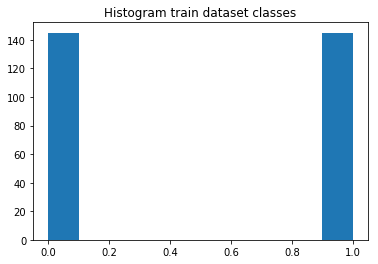

In [10]:
x_train = x_train_res
y_train = y_train_res
print('Resampled dataset shape %s' % Counter(y_train))
plt.hist(y_train, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram train dataset classes")
plt.show()

Test dataset shape Counter({0.0: 63, 1.0: 15})


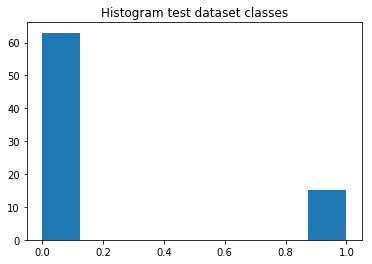

In [11]:
print('Test dataset shape %s' % Counter(y_test))
plt.hist(y_test, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram test dataset classes")
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

###Train logistic regression

In [13]:
#Train classifier
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(x_train, y_train)
y_pred = log_classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###Test logistic regression

In [14]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.5769230769230769 

Confusion Matrix 
 [[36 27]
 [ 6  9]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.86      0.57      0.69        63
       Adult       0.25      0.60      0.35        15

   micro avg       0.58      0.58      0.58        78
   macro avg       0.55      0.59      0.52        78
weighted avg       0.74      0.58      0.62        78



##Suport Vector Machine

In [ ]:
from sklearn.svm import SVC

###Training SVM

In [ ]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train) 
y_pred = svm.predict(x_test)

###Testing SVM

In [17]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.5512820512820513 

Confusion Matrix 
 [[33 30]
 [ 5 10]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.87      0.52      0.65        63
       Adult       0.25      0.67      0.36        15

   micro avg       0.55      0.55      0.55        78
   macro avg       0.56      0.60      0.51        78
weighted avg       0.75      0.55      0.60        78



##Decision Tree

In [ ]:
from sklearn import tree

###Training Decision Tree

In [ ]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(x_train, y_train) 
y_pred = d_tree.predict(x_test)

###Testing Decision Tree

In [20]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.5512820512820513 

Confusion Matrix 
 [[40 23]
 [12  3]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.77      0.63      0.70        63
       Adult       0.12      0.20      0.15        15

   micro avg       0.55      0.55      0.55        78
   macro avg       0.44      0.42      0.42        78
weighted avg       0.64      0.55      0.59        78



##Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

###Training Naive Bayes

In [ ]:
bayes = GaussianNB()
bayes.fit(x_train, y_train) 
y_pred = bayes.predict(x_test)

###Testing Naive Bayes

In [23]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.47435897435897434 

Confusion Matrix 
 [[28 35]
 [ 6  9]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.82      0.44      0.58        63
       Adult       0.20      0.60      0.31        15

   micro avg       0.47      0.47      0.47        78
   macro avg       0.51      0.52      0.44        78
weighted avg       0.70      0.47      0.52        78



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

###Training Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train) 
y_pred = forest.predict(x_test)

###Testing Random Forest

In [26]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.6410256410256411 

Confusion Matrix 
 [[47 16]
 [12  3]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.80      0.75      0.77        63
       Adult       0.16      0.20      0.18        15

   micro avg       0.64      0.64      0.64        78
   macro avg       0.48      0.47      0.47        78
weighted avg       0.67      0.64      0.66        78



##Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

###Training Boosting

In [ ]:
boosting = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1)
boosting.fit(x_train, y_train) 
boosting = forest.predict(x_test)

###Testing Boosting

In [29]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.6410256410256411 

Confusion Matrix 
 [[47 16]
 [12  3]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.80      0.75      0.77        63
       Adult       0.16      0.20      0.18        15

   micro avg       0.64      0.64      0.64        78
   macro avg       0.48      0.47      0.47        78
weighted avg       0.67      0.64      0.66        78

